# Assignment 03

- Name: Wenhao Fang
- ID: n01555914


---


## Import Dataset


In [249]:
# render Matplotlib plots directly in the notebook cells.
# %matplotlib inline

import pandas as pd

DATASET_PATH = "./a3_data.csv"

df = pd.read_csv(DATASET_PATH)
df

,at1,at2,at3,at4,at5,at6,at7,at8,y
0,-4.87,7.83,-6.66,-0.37,-3.12,5.16,9.11,-5.00,1
1,-3.06,-5.30,3.77,3.44,-3.15,9.09,-2.85,5.28,0
2,-0.72,-6.65,-2.69,-6.97,0.09,4.20,1.99,-2.09,0
3,9.06,-7.11,9.62,1.37,6.17,8.52,-0.77,-3.88,0
4,7.53,4.48,2.60,6.57,7.18,-5.30,6.58,-2.14,0
...,...,...,...,...,...,...,...,...,...
995,-5.74,1.34,7.50,7.32,-0.89,-9.09,0.74,5.46,0
996,7.58,9.84,-1.31,-9.52,-0.44,-2.82,0.62,-9.47,0
997,0.48,5.44,7.39,-5.87,-6.54,-7.56,-7.09,-6.76,1
998,-5.58,-1.75,7.21,-3.56,9.60,8.35,-0.46,5.72,0


- Check information and check null values.


In [250]:
print("Dataset Information:")
df.info()


print("\nNull Values in Each Column:")
is_null = df.isnull().sum()
print(is_null)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   at1     1000 non-null   float64
 1   at2     1000 non-null   float64
 2   at3     1000 non-null   float64
 3   at4     1000 non-null   float64
 4   at5     1000 non-null   float64
 5   at6     1000 non-null   float64
 6   at7     1000 non-null   float64
 7   at8     1000 non-null   float64
 8   y       1000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 70.4 KB

Null Values in Each Column:
at1    0
at2    0
at3    0
at4    0
at5    0
at6    0
at7    0
at8    0
y      0
dtype: int64


---


## Prepare Data

- Extract features and labels


In [251]:
import pandas as pd
import torch

# Extract features and labels
feature = df[df.columns[df.columns != 'y']]
label = df['y']

print("\n Features: \n", feature)
print("\n Label: \n", label)


 Features: 
       at1   at2   at3   at4   at5   at6   at7   at8
0   -4.87  7.83 -6.66 -0.37 -3.12  5.16  9.11 -5.00
1   -3.06 -5.30  3.77  3.44 -3.15  9.09 -2.85  5.28
2   -0.72 -6.65 -2.69 -6.97  0.09  4.20  1.99 -2.09
3    9.06 -7.11  9.62  1.37  6.17  8.52 -0.77 -3.88
4    7.53  4.48  2.60  6.57  7.18 -5.30  6.58 -2.14
..    ...   ...   ...   ...   ...   ...   ...   ...
995 -5.74  1.34  7.50  7.32 -0.89 -9.09  0.74  5.46
996  7.58  9.84 -1.31 -9.52 -0.44 -2.82  0.62 -9.47
997  0.48  5.44  7.39 -5.87 -6.54 -7.56 -7.09 -6.76
998 -5.58 -1.75  7.21 -3.56  9.60  8.35 -0.46  5.72
999  0.77 -6.94  3.94  5.65  8.92  2.36 -6.73  9.44

[1000 rows x 8 columns]

 Label: 
 0      1
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    1
998    0
999    0
Name: y, Length: 1000, dtype: int64


- Convert data frame into tensor.


In [252]:

# Convert df into tensor
X = torch.tensor(feature.values, dtype=torch.float32)
Y = torch.tensor(label.values, dtype=torch.float32)

print("\n Features tensor:\n", X)
print("\n Label tensor:\n", Y)


 Features tensor:
 tensor([[-4.8700,  7.8300, -6.6600,  ...,  5.1600,  9.1100, -5.0000],
        [-3.0600, -5.3000,  3.7700,  ...,  9.0900, -2.8500,  5.2800],
        [-0.7200, -6.6500, -2.6900,  ...,  4.2000,  1.9900, -2.0900],
        ...,
        [ 0.4800,  5.4400,  7.3900,  ..., -7.5600, -7.0900, -6.7600],
        [-5.5800, -1.7500,  7.2100,  ...,  8.3500, -0.4600,  5.7200],
        [ 0.7700, -6.9400,  3.9400,  ...,  2.3600, -6.7300,  9.4400]])

 Label tensor:
 tensor([1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
        0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
        1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
        0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
        0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1

---


## Define model


In [253]:
import torch.nn as nn
import matplotlib.pyplot as plt


class MLP_Model():
    def __init__(self, feature, label, hidden_size, learning_rate, epoch):
        ''' Constructor '''
        self.feature = feature
        self.label = label
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.epoch = epoch

        self.model = nn.Sequential(
            # define input layer to a hidden layer
            nn.Linear(self.feature.size(1), self.hidden_size),
            nn.ReLU(),      # activation func
            # define hidden layer to output layer
            nn.Linear(self.hidden_size, self.label.size(0))
            # can apply activation func here. if not, defuat af will apply.
        )
        self.loss_fun = torch.nn.MSELoss()   # use MSE as the loss function
        self.optimizer = torch.optim.Adam(
            self.model.parameters(), lr=self.learning_rate)     # algorithm
        # pass the parameter to the optimizer
        # since we have 1 hidden layer, parameters are w1, w2, b1, b2.

        # Lists to store training metrics
        self.loss_record = []
        self.accuracy_record = []

    def plot_loss(self):
        ''' plot a loss function '''
        min_loss_value = min(self.loss_record)
        min_loss_epoch = self.loss_record.index(min_loss_value) + 1

        plt.plot(
            range(1, self.epoch + 1),
            self.loss_record,
            label='Training Loss'
        )

        # Annotate every 5th loss value
        for epoch, loss in enumerate(self.loss_record, start=1):
            if epoch % 5 == 0:
                plt.annotate(f'{loss:.4f}', (epoch, loss), textcoords="offset points", xytext=(
                    0, 5), ha='center')

        plt.title('Loss Per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def train(self):
        ''' Function to train model '''
        for epoch in range(self.epoch):
            y_pred = self.model(self.feature)       # get prediction
            loss = self.loss_fun(y_pred, self.label)  # get the loss

            # output the loss
            # print(f"epoch: {epoch+1}, loss: {loss.item()}")
            # .item(): Returns the value of this tensor as a standard Python number.

            # Store loss in record
            self.loss_record.append(loss.item())

            # reset all GD, Resets the gradients of all optimized torch.Tensor s.
            self.optimizer.zero_grad()
            loss.backward()             # Computes the gradient of current tensor
            # ajust the paramter, Perform a single optimization step.
            self.optimizer.step()

        # plot loss after training
        self.plot_loss()

---


## Train Model

- Define initial parameters


c:\Users\simon\iCloudDrive\Documents\Github\PyTorch_Deep_Learning_ITE-5410\env\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


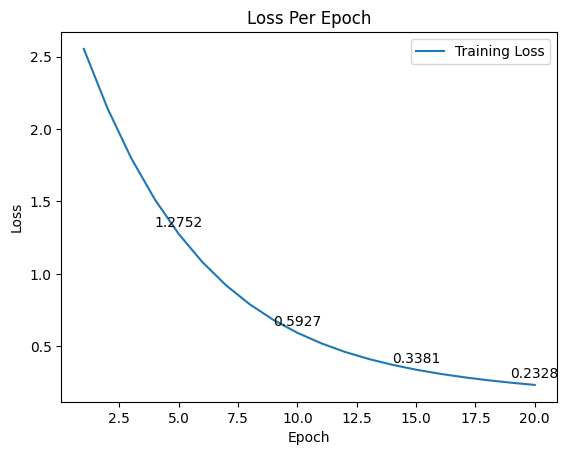

In [254]:
HIDDEN_SIZE = 8     # the size of input size
LR = 0.01
EPOCH = 20

mlp_model = MLP_Model(
    feature=X, label=Y,
    hidden_size=HIDDEN_SIZE,
    learning_rate=LR,
    epoch=EPOCH
)
mlp_model.train()

---


## Performance Trial

- Double hidden layer size
  - `HIDDEN_SIZE = 16`


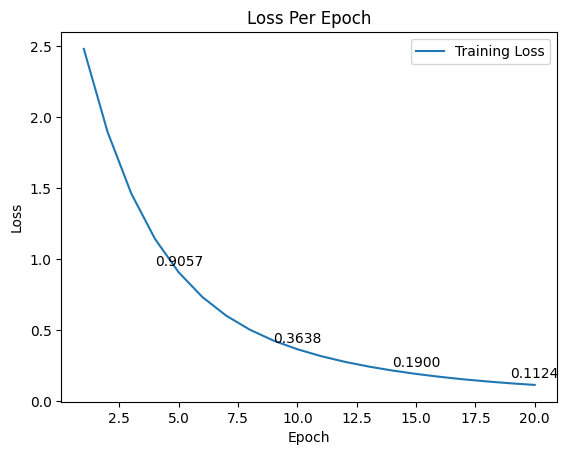

In [255]:
HIDDEN_SIZE = 16
LR = 0.01
EPOCH = 20

mlp_model = MLP_Model(
    feature=X, label=Y,
    hidden_size=HIDDEN_SIZE,
    learning_rate=LR,
    epoch=EPOCH
)
mlp_model.train()

- Double Learning Rate
  - `LR = 0.02`


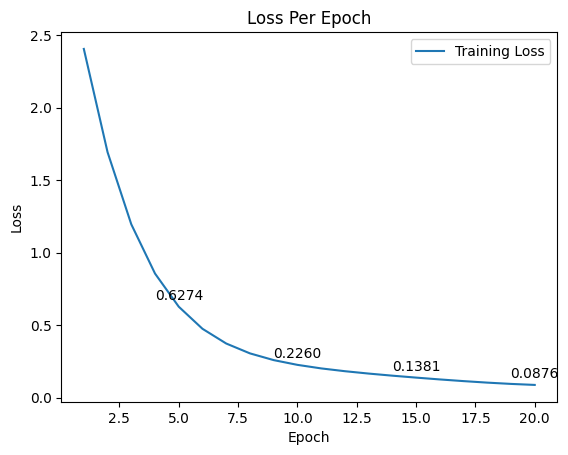

In [256]:
HIDDEN_SIZE = 8
LR = 0.02
EPOCH = 20

mlp_model = MLP_Model(
    feature=X, label=Y,
    hidden_size=HIDDEN_SIZE,
    learning_rate=LR,
    epoch=EPOCH
)
mlp_model.train()

- Double Eproch
  - `EPOCH = 40`


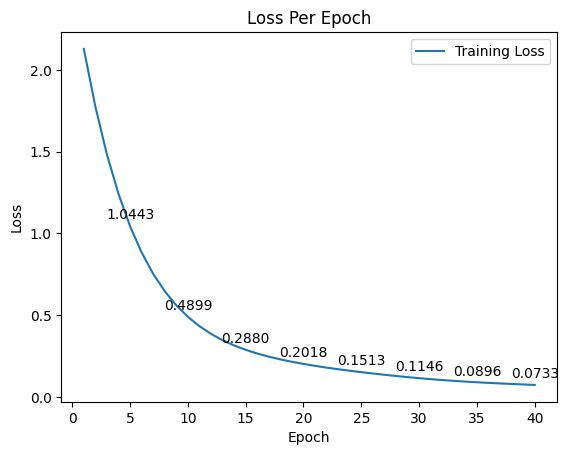

In [257]:
HIDDEN_SIZE = 8
LR = 0.01
EPOCH = 40

mlp_model = MLP_Model(
    feature=X, label=Y,
    hidden_size=HIDDEN_SIZE,
    learning_rate=LR,
    epoch=EPOCH
)
mlp_model.train()

### Summary

- Learning rate, hidden layer size, and eporch are factors affecting performance.
